In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, q_true, epsilon, initial_value=None):
        self.q_true = q_true  # 액션에 대한 실제 Q 값
        self.k = len(q_true)  # 액션의 개수
        
        if initial_value is None:
            self.reset()
        else:
            self.reset(initial_value)
    
    def reset(self, initial_value=None):
        # 초기 추정값 설정
        if initial_value is None:
            self.q_estimates = np.zeros(self.k)  # 모든 액션의 추정값을 0으로 초기화
        else:
            self.q_estimates = np.array(initial_value)  # 주어진 초기 추정값으로 초기화
        self.action_counts = np.zeros(self.k)  # 각 액션의 선택 횟수 초기화
        
    def choose_action(self, epsilon):
        # epsilon-greedy 정책에 따라 액션 선택
        if np.random.random() < epsilon:  # 무작위 액션 선택
            action = np.random.randint(self.k)
        else:  # 현재 추정값이 가장 높은 액션 선택
            action = np.argmax(self.q_estimates)
        return action
    
    def take_action(self, action):
        # 선택한 액션 수행 및 보상 계산
        reward = np.random.normal(loc=self.q_true[action], scale=1)  # 실제 Q 값을 평균으로 하는 정규 분포에서 보상 샘플링
        self.action_counts[action] += 1  # 액션 선택 횟수 증가
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]  # 추정값 업데이트
        return reward
    
def simulate(n_simulations, n_steps, k, epsilon, initial_value=None):
    rewards = np.zeros((n_simulations, n_steps))  # 각 시뮬레이션에서의 보상 기록
    optimal_actions = np.zeros((n_simulations, n_steps))  # 각 시뮬레이션에서의 최적 액션 선택 여부 기록
    
    for i in range(n_simulations):
        # Bandit 클래스 인스턴스 생성
        bandit = Bandit(q_true=np.random.normal(loc=0, scale=1, size=k), epsilon=epsilon, initial_value=initial_value)
        
        for j in range(n_steps):
            action = bandit.choose_action(epsilon)  # 액션 선택
            reward = bandit.take_action(action)  # 액션 수행 및 보상 계산
            rewards[i, j] = reward  # 보상 기록
            optimal_actions[i, j] = int(action == np.argmax(bandit.q_true))  # 최적 액션 선택 여부 기록
    
    average_rewards = np.mean(rewards, axis=0)  # 평균 보상 계산
    percentage_optimal = np.mean(optimal_actions, axis=0) * 100  # 최적 액션 선택 비율 계산
    
    return average_rewards, percentage_optimal


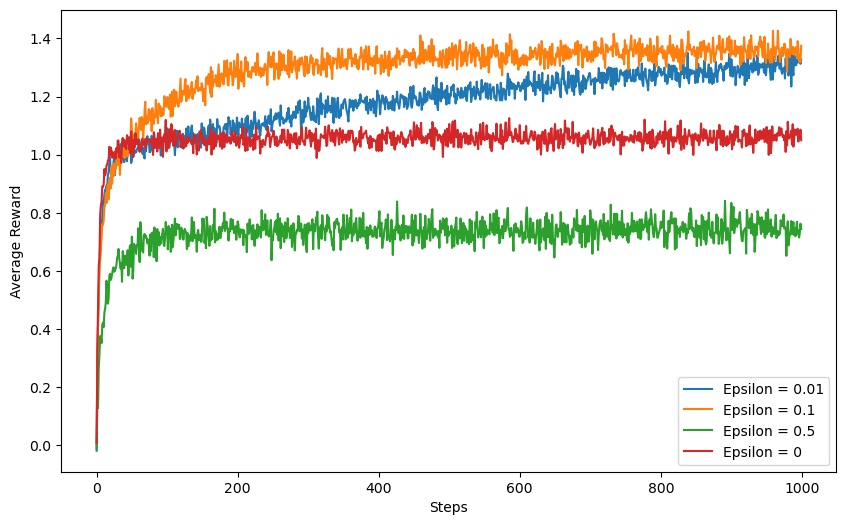

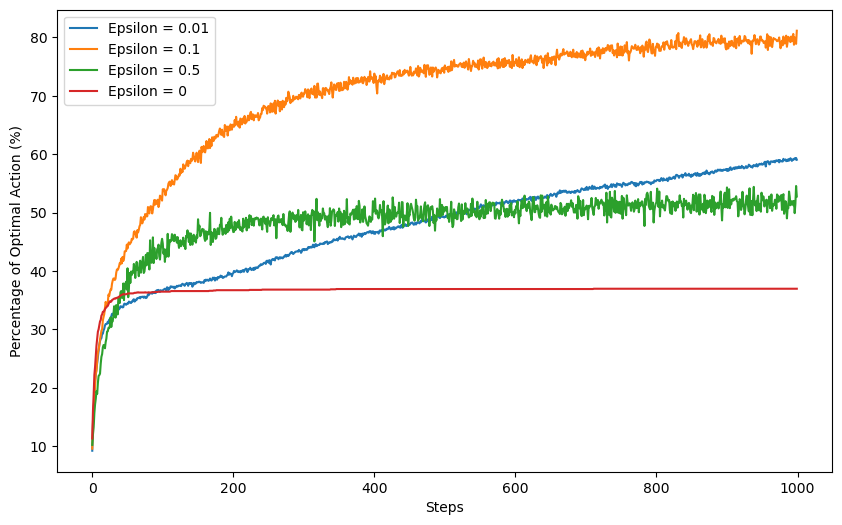

In [3]:
average_rewards_list = []
percentage_optimal_list = []

n_simulations = 2000
n_steps = 1000
k = 10
epsilons = [0.01, 0.1, 0.5, 0] #Make difference of epsilons (random variable rate)
average_rewards_list = []
percentage_optimal_list = []

#epsilon에 따른 결과값 리스트 만들기
for epsilon in epsilons:
    average_rewards, percentage_optimal = simulate(n_simulations, n_steps, k, epsilon)
    average_rewards_list.append(average_rewards)
    percentage_optimal_list.append(percentage_optimal)

#epsilon에 따른 average_Rewards_list 만들기
plt.figure(figsize=(10, 6))
for epsilon, average_rewards in zip(epsilons, average_rewards_list):
    plt.plot(average_rewards, label=f"Epsilon = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

#epsilon에 따른 percentage_optimal_list 만들기
plt.figure(figsize=(10, 6))
for epsilon, percentage_optimal in zip(epsilons, percentage_optimal_list):
    plt.plot(percentage_optimal, label=f"Epsilon = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Percentage of Optimal Action (%)")
plt.legend()
plt.show()

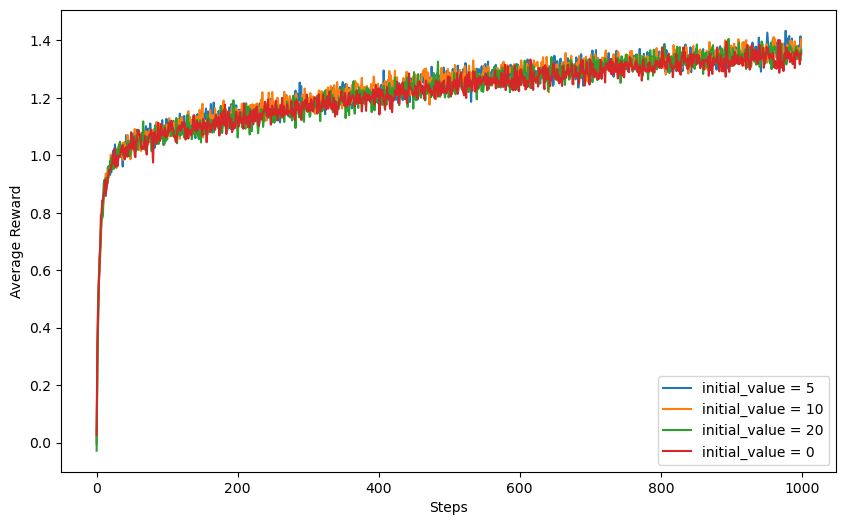

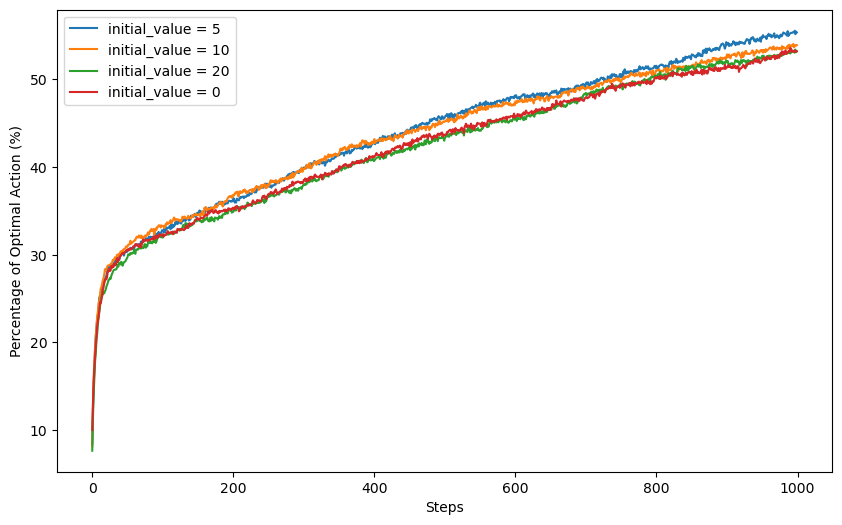

In [4]:
average_rewards_list = []
percentage_optimal_list = []

n_simulations = 2000
n_steps = 1000
initial_values = [5, 10, 20, 0]
k = 12
epsilon = 0.01

#epsilon에 따른 결과값 리스트 만들기
for initial_value in initial_values:
    initial_value = np.full(k, initial_value)
    average_rewards, percentage_optimal = simulate(n_simulations, n_steps, k, epsilon)
    average_rewards_list.append(average_rewards)
    percentage_optimal_list.append(percentage_optimal)

#epsilon에 따른 average_Rewards_list 만들기
plt.figure(figsize=(10, 6))
for initial_value, average_rewards in zip(initial_values, average_rewards_list):
    plt.plot(average_rewards, label=f"initial_value = {initial_value}")
    
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

#epsilon에 따른 percentage_optimal_list 만들기
plt.figure(figsize=(10, 6))
for initial_value, percentage_optimal in zip(initial_values, percentage_optimal_list):
    plt.plot(percentage_optimal, label=f"initial_value = {initial_value}")

plt.xlabel("Steps")
plt.ylabel("Percentage of Optimal Action (%)")
plt.legend()
plt.show()

In [5]:
class Bandit3:
    def __init__(self, q_true):
        self.q_true = q_true
        self.k = len(q_true)
        self.reset()

    def reset(self):
        self.q_estimates = np.zeros(self.k)
        self.action_counts = np.zeros(self.k)

    #UCB 알고리즘 구현
    def choose_action(self, t, c):
        ucb_values = self.q_estimates + c * np.sqrt(np.log(t+1) / (self.action_counts + 1e-5))
        #UCB가 가장 큰 것 선택
        action = np.argmax(ucb_values)
        return action
    
    # 선택한 액션 수행 및 보상 계산
    def take_action(self, action):
        reward = np.random.normal(loc=self.q_true[action], scale=1)
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]
        return reward

def simulate(n_simulations, n_steps, epsilon, c):
    rewards = np.zeros((n_simulations, n_steps)) # 각 시뮬레이션에서의 보상 기록
    optimal_actions = np.zeros((n_simulations, n_steps)) # 각 시뮬레이션에서의 최적 액션 선택 여부 기록
    
    # Bandit 클래스 인스턴스 생성
    for i in range(n_simulations):
        bandit = Bandit3(q_true=np.random.normal(loc=0, scale=1, size=10))
        
        # 액션 선택
        for j in range(n_steps):
            t = i * n_steps + j + 1
            if np.random.random() < epsilon:
                action = np.random.randint(bandit.k)
            else:
                action = bandit.choose_action(t, c)
            reward = bandit.take_action(action)
            rewards[i, j] = reward
            optimal_actions[i, j] = int(action == np.argmax(bandit.q_true))
    
    #average_rewards, percentage_optimal
    average_rewards = np.mean(rewards, axis=0)
    percentage_optimal = np.mean(optimal_actions, axis=0) * 100
    return average_rewards, percentage_optimal

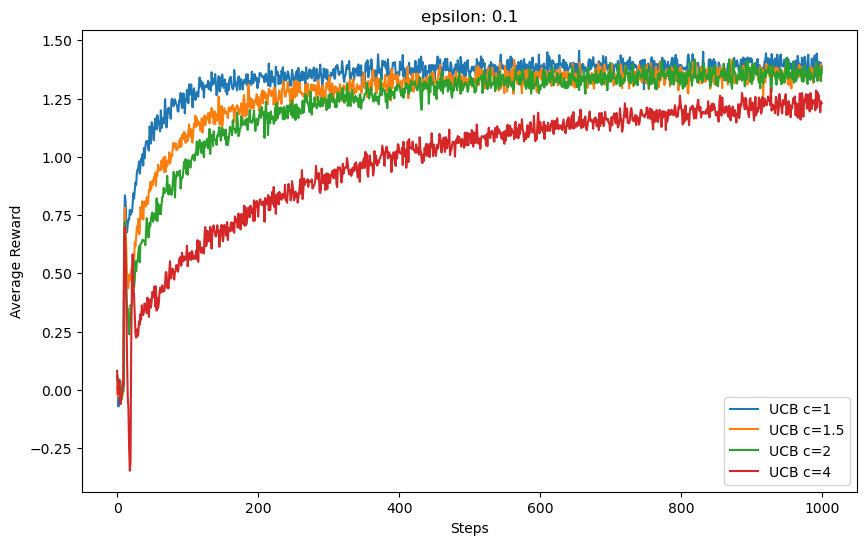

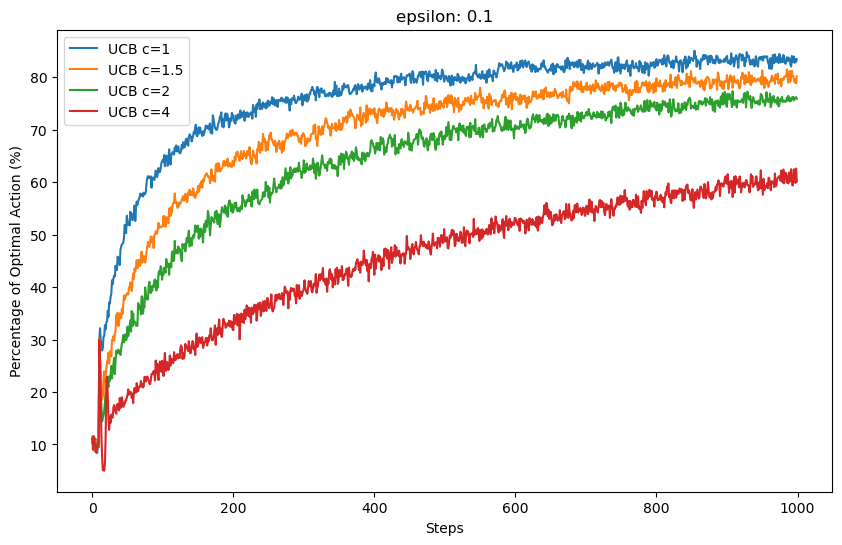

In [ ]:
n_simulations = 2000
n_steps = 1000
epsilon_values = [0.1, 0.01]
c_values = [1, 1.5, 2, 4]
labels = ['UCB c=1', 'UCB c=1.5', 'UCB c=2', 'UCB c=4']

for epsilon in epsilon_values:
    average_reward_list = []
    percentage_optimal_list = []
    
    #average_rewards, percentage_optimal
    plt.figure(figsize=(10, 6))
    for c, label in zip(c_values, labels):
        average_rewards, percentage_optimal = simulate(n_simulations, n_steps, epsilon, c)
        average_reward_list.append(average_rewards)
        percentage_optimal_list.append(percentage_optimal)
        plt.plot(average_rewards, label=label)
        
    #epsion에 Average Reward    
    plt.title(f"epsilon: {epsilon}")
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for percentage_optimal, label in zip(percentage_optimal_list, labels):
        plt.plot(percentage_optimal, label=label)
        
    #epsion에 Percentage_optimal      
    plt.title(f"epsilon: {epsilon}")
    plt.xlabel("Steps")
    plt.ylabel("Percentage of Optimal Action (%)")
    plt.legend()
    plt.show()